In [1]:
import os
os.chdir('..')

from util import CONFIG
CONFIG.set_use_mpl_tables(True)

## Section 7.1

Listing 7.1

In [2]:
from sim_circuit import QuantumRegister, QuantumCircuit
from math import pi

def encode_frequency(n, v):
    q = QuantumRegister(n)
    qc = QuantumCircuit(q)

    for j in range(n):
        qc.h(q[j])

    for j in range(n):
        qc.p(2 * pi / 2 ** (n - j) * v, q[j]) # <1>

    qc.report('geometric_sequence') # <2>

    qc.iqft(range(n))

    qc.report('iqft')

    return qc

Listing 7.2

In [3]:
from util import cis, prod

def complex_sincd(n, v):
    N = 2 ** n
    return [prod(
        cos((v - k) * pi / 2 ** (j + 1)) * cis((v - k) * pi / 2 ** (j + 1))
        for j in range(n)) for k in range(2 ** n)]

In [4]:
n = 3

qc1 = encode_frequency(n, 3)

qc2 = encode_frequency(n, 3.8)

In [5]:
result = qc1.measure(shots = 10)

In [6]:
result['counts']

{3: 10}

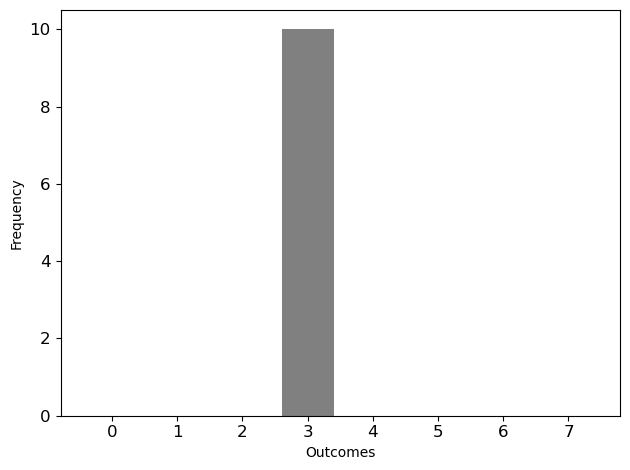

In [7]:
from util import plot_bars

for outcome in range(2**n):
    result['counts'][outcome] = result['counts'].get(outcome, 0)
    
plot_bars(dict(sorted(result['counts'].items())), '', 'Outcomes', 'Frequency', color='grey')

In [8]:
result = qc2.measure(shots = 10)

In [9]:
result['counts']

{4: 8, 3: 2}

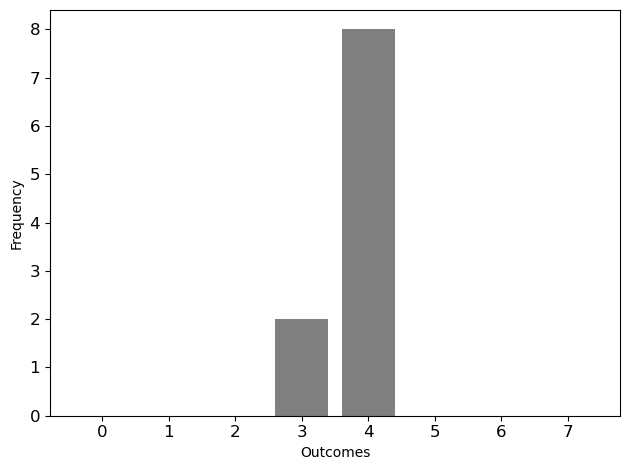

In [10]:
for outcome in range(2**n):
    result['counts'][outcome] = result['counts'].get(outcome, 0)
    
plot_bars(dict(sorted(result['counts'].items())), '', 'Outcomes', 'Frequency', color='grey')

#### Section 7.1.1

In [11]:
n = 3
v = 4.76
qc = encode_frequency(n, v)

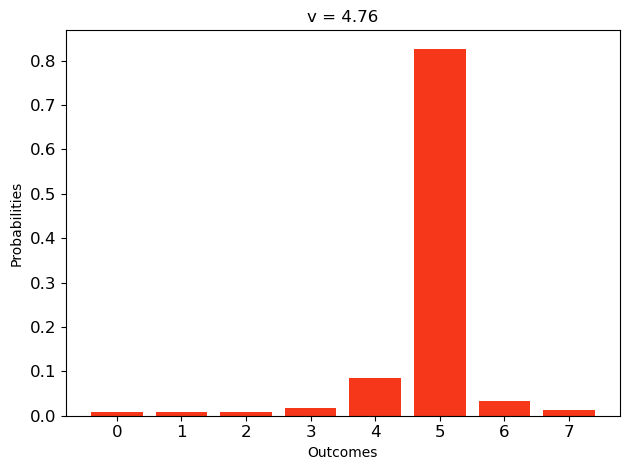

In [12]:
from util import list_to_dict

state = qc.run()
probs = [abs(a)**2 for a in state]
plot_bars(list_to_dict(probs, False), f'v = {v}', 'Outcomes', 'Probabilities')

In [13]:
result = qc.measure(shots = 100)

result['counts']

{5: 84, 4: 8, 6: 4, 3: 2, 0: 1, 7: 1}

In [14]:
n = 5
v = 19.05
qc = encode_frequency(n, v)

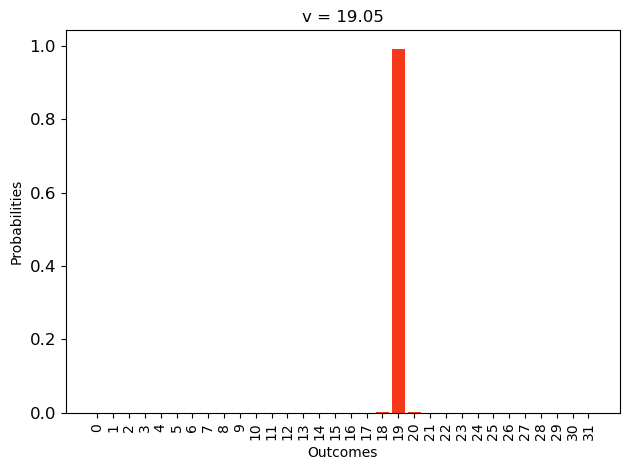

In [15]:
state = qc.run()
probs = [abs(a)**2 for a in state]
plot_bars(list_to_dict(probs, False), f'v = {v}', 'Outcomes', 'Probabilities')

In [16]:
result = qc.measure(shots = 100)

result['counts']

{19: 100}

#### Section 7.1.2

In [17]:
result['counts'] = {5: 79, 4: 12, 6: 3, 7: 3, 3: 2, 2: 1}

In [18]:
from math import sqrt

p_4 = result['counts'][4]/sum(result['counts'].values()) # <1>
p_5 = result['counts'][5]/sum(result['counts'].values())

decimal_estimate = sqrt(p_5)/(sqrt(p_4)+ sqrt(p_5))

In [19]:
decimal_estimate

0.7195580800495327

## Section 7.2

In [20]:
def ry_circuit(theta):
    q = QuantumRegister(1)
    qc = QuantumCircuit(q)
    qc.ry(theta, q[0])

    return qc

In [21]:
def ry_eigen_circuit():
    q = QuantumRegister(1)
    qc = QuantumCircuit(q)

    qc.x(q[0])
    qc.rx(-pi/2, q[0])

    return qc

In [22]:
from util import print_state_table

qc = ry_eigen_circuit()
state = qc.run()

print_state_table(state)


Outcome  Binary  Amplitude           Magnitude  Direction  Amplitude Bar             Probability
------------------------------------------------------------------------------------------------
0        0       0.0000 + i0.7071    0.7071       90.00°   ████████████████          0.5   
1        1       0.7071 + i0.0000    0.7071        0.00°   ████████████████          0.5   



In [23]:
from util import all_close

qc = ry_eigen_circuit()
state = qc.run()

assert all_close(state, [1j/sqrt(2), 1/sqrt(2)])

In [24]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)

qc.x(q[0])
qc.rx(-pi/2, q[0])

theta = pi/6

qc.ry(2*theta, q[0])

state = qc.run()

In [25]:
print_state_table(state)


Outcome  Binary  Amplitude           Magnitude  Direction  Amplitude Bar             Probability
------------------------------------------------------------------------------------------------
0        0      -0.3536 + i0.6124    0.7071      120.00°   ████████████████          0.5   
1        1       0.6124 + i0.3536    0.7071       30.00°   ████████████████          0.5   



In [26]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)

qc.x(q[0])
qc.rx(-pi/2, q[0])

theta = pi/6

qc.ry(2*theta, q[0]) # <1>
qc.ry(2*theta, q[0]) # <1>

state = qc.run()

In [27]:
print_state_table(state)


Outcome  Binary  Amplitude           Magnitude  Direction  Amplitude Bar             Probability
------------------------------------------------------------------------------------------------
0        0      -0.6124 + i0.3536    0.7071      150.00°   ████████████████          0.5   
1        1       0.3536 + i0.6124    0.7071       60.00°   ████████████████          0.5   



### Section 7.3

In [28]:
n = 3
q = QuantumRegister(n)
a = QuantumRegister(1)
qc = QuantumCircuit(q, a)

In [29]:
qc.x(a[0])
qc.rx(-pi/2, a[0])

In [30]:
for i in range(n):
    qc.h(q[i])

theta = 4.7*2*pi/2**n

for i in range(n):
    for _ in range(2**i):
        qc.cry(2*theta, q[i], a[0])  # <1> 

In [31]:
qc.rx(pi/2, a[0])
qc.x(a[0])

In [32]:
qc.iqft(q)

In [33]:
from util import all_close
from math import cos

state = qc.run()

n = 3
theta = 4.7*2*pi/2**n
s = complex_sincd(n, theta/(2*pi)*2**n)
assert all_close(state[:2**n], s)

### Section 7.4

In [34]:
def ry_phase_encoding_from_eigenstate(n, theta):
    
    q = QuantumRegister(n)
    a = QuantumRegister(1)
    qc = QuantumCircuit(q, a)

    qc.append(ry_eigen_circuit(), a)
    qc.report('eigenstate')

    for i in range(n):
        qc.h(q[i])

    for i in range(n):
        for _ in range(2**i):
            qc.c_append(ry_circuit(2*theta), q[i], a)
            
    qc.report('geometric_sequence_superposition')
    
    qc.append(ry_eigen_circuit().inverse(), a)

    qc.report('geometric_sequence')

    qc.iqft(q)
    qc.report('estimate')

    return qc

In [35]:
n = 3
theta = 4.7*2*pi/2**n
qc = ry_phase_encoding_from_eigenstate(n, theta)

In [36]:
from util_qiskit import hume_to_qiskit

qc_qiskit = hume_to_qiskit(qc.regs, qc.reports['eigenstate'][1])
print(qc_qiskit)

                       
q0_0: ─────────────────
                       
q0_1: ─────────────────
                       
q0_2: ─────────────────
      ┌───┐┌──────────┐
  q1: ┤ X ├┤ Rx(-π/2) ├
      └───┘└──────────┘


In [37]:
print_state_table(qc.reports['eigenstate'][2])


Outcome  Binary  Amplitude           Magnitude  Direction  Amplitude Bar             Probability
------------------------------------------------------------------------------------------------
0        0000    0.0000 + i0.7071    0.7071       90.00°   ████████████████          0.5   
1        0001    0.0000 + i0.0000    0.0                                             0.0   
2        0010    0.0000 + i0.0000    0.0                                             0.0   
3        0011    0.0000 + i0.0000    0.0                                             0.0   
4        0100    0.0000 + i0.0000    0.0                                             0.0   
5        0101    0.0000 + i0.0000    0.0                                             0.0   
6        0110    0.0000 + i0.0000    0.0                                             0.0   
7        0111    0.0000 + i0.0000    0.0                                             0.0   
8        1000    0.7071 + i0.0000    0.7071        0.00°   ██████████

In [38]:
qc_qiskit = hume_to_qiskit(qc.regs, qc.reports['geometric_sequence_superposition'][1])
print(qc_qiskit)

      ┌───┐                                                        »
q2_0: ┤ H ├──────■─────────────────────────────────────────────────»
      ├───┤      │                                                 »
q2_1: ┤ H ├──────┼─────────────■─────────────■─────────────────────»
      ├───┤      │             │             │                     »
q2_2: ┤ H ├──────┼─────────────┼─────────────┼─────────────■───────»
      └───┘┌─────┴──────┐┌─────┴──────┐┌─────┴──────┐┌─────┴──────┐»
  q3: ─────┤ Ry(7.3827) ├┤ Ry(7.3827) ├┤ Ry(7.3827) ├┤ Ry(7.3827) ├»
           └────────────┘└────────────┘└────────────┘└────────────┘»
«                                                
«q2_0: ──────────────────────────────────────────
«                                                
«q2_1: ──────────────────────────────────────────
«                                                
«q2_2: ──────■─────────────■─────────────■───────
«      ┌─────┴──────┐┌─────┴──────┐┌─────┴──────┐
«  q3: ┤ Ry(7.3827) ├┤ Ry(7.3

In [39]:
print_state_table(qc.reports['geometric_sequence_superposition'][2])


Outcome  Binary  Amplitude           Magnitude  Direction  Amplitude Bar             Probability
------------------------------------------------------------------------------------------------
0        0000    0.0000 + i0.2500    0.25         90.00°   █████                     0.0625
1        0001    0.1306 - i0.2132    0.25        -58.49°   █████                     0.0625
2        0010   -0.2228 + i0.1135    0.25        153.00°   █████                     0.0625
3        0011    0.2492 + i0.0196    0.25          4.50°   █████                     0.0625
4        0100   -0.2023 - i0.1469    0.25       -144.99°   █████                     0.0625
5        0101    0.0957 + i0.2310    0.25         67.50°   █████                     0.0625
6        0110    0.0391 - i0.2469    0.25        -81.00°   █████                     0.0625
7        0111   -0.1624 + i0.1901    0.25        130.51°   █████                     0.0625
8        1000    0.2500 + i0.0000    0.25          0.00°   █████     

In [40]:
print_state_table(qc.reports['geometric_sequence'][2])


Outcome  Binary  Amplitude           Magnitude  Direction  Amplitude Bar             Probability
------------------------------------------------------------------------------------------------
0        0000    0.3536 + i0.0000    0.3536        0.00°   ████████                  0.125 
1        0001   -0.3015 - i0.1847    0.3536     -148.49°   ████████                  0.125 
2        0010    0.1605 + i0.3150    0.3536       63.00°   ████████                  0.125 
3        0011    0.0277 - i0.3525    0.3536      -85.49°   ████████                  0.125 
4        0100   -0.2078 + i0.2860    0.3536      126.00°   ████████                  0.125 
5        0101    0.3266 - i0.1353    0.3536      -22.50°   ████████                  0.125 
6        0110   -0.3492 - i0.0553    0.3536     -171.00°   ████████                  0.125 
7        0111    0.2688 + i0.2296    0.3536       40.50°   ████████                  0.125 
8        1000    0.0000 + i0.0000    0.0                             

In [41]:
qc_qiskit = hume_to_qiskit(qc.regs, qc.reports['estimate'][1])
print(qc_qiskit)

                                              ┌───┐   
q4_0: ────────────────■──────────────■────────┤ H ├─X─
                      │        ┌───┐ │P(-π/2) └───┘ │ 
q4_1: ──────■─────────┼────────┤ H ├─■──────────────┼─
      ┌───┐ │P(-π/2)  │P(-π/4) └───┘                │ 
q4_2: ┤ H ├─■─────────■─────────────────────────────X─
      └───┘                                           
  q5: ────────────────────────────────────────────────
                                                      


In [42]:
print_state_table(qc.reports['estimate'][2])


Outcome  Binary  Amplitude           Magnitude  Direction  Amplitude Bar             Probability
------------------------------------------------------------------------------------------------
0        0000    0.0986 + i0.0364    0.1051       20.26°   ██                        0.011 
1        0001    0.0748 + i0.0691    0.1018       42.73°   ██                        0.0104
2        0010    0.0485 + i0.1053    0.1159       65.27°   ██                        0.0134
3        0011    0.0064 + i0.1632    0.1633       87.75°   ███                       0.0267
4        0100   -0.1289 + i0.3495    0.3726      110.24°   ████████                  0.1388
5        0101    0.5840 - i0.6318    0.8604      -47.75°   ████████████████████      0.7403
6        0110    0.1880 - i0.0866    0.207       -24.27°   ████                      0.0428
7        0111    0.1287 - i0.0051    0.1288       -2.73°   ███                       0.0166
8        1000    0.0000 + i0.0000    0.0                             

### Section 7.5

Listing 7.4

In [43]:
def phase_estimation_circuit(n, circuit, eigen_circuit=None):
    q = QuantumRegister(n)
    a = QuantumRegister(sum(circuit.regs))
    qc = QuantumCircuit(q, a) # <1>

    if eigen_circuit is not None:
        qc.append(eigen_circuit, a)
        qc.report('eigenstate')

    for i in range(n):
        qc.h(q[i])

    for i in range(n):
        for _ in range(2**i):
            qc.c_append(circuit, q[i], a)

    qc.report('geometric_sequence_superposition')

    if eigen_circuit is not None:
        qc.append(eigen_circuit.inverse(), a)
        qc.report('geometric_sequence')

    qc.iqft(q)
    qc.report('estimate')

    return qc

In [44]:
n = 3
N = 2**n
theta = 4.7*2*pi/N

qc = phase_estimation_circuit(n, ry_circuit(2*theta), ry_eigen_circuit())

In [45]:
eig = qc.reports['eigenstate'][2]
assert all_close(eig, [1j/sqrt(2) if k == 0 else 0 for k in range(N)] +
    [1/sqrt(2) if k == 0 else 0 for k in range(N)])

geom = qc.reports['geometric_sequence'][2]
g = [1/sqrt(N)*cis(k*theta) for k in range(N)]
assert all_close(geom[:N], g)

estimate = qc.reports['estimate'][2]
s = complex_sincd(n, theta/(2*pi)*N)
assert all_close(estimate, s + [0 for _ in range(N)])

### Section 7.6

In [46]:
def phase_estimation_circuit(n, circuit, eigen_circuit=None, swap=True):
    q = QuantumRegister(n)
    a = QuantumRegister(sum(circuit.regs))
    qc = QuantumCircuit(q, a) # a is last (at the bottom)

    if eigen_circuit is not None:
        qc.append(eigen_circuit, a)
    qc.report('eigenstate')

    for i in range(n):
        qc.h(q[i])

    for i in range(n):
        for _ in range(2**i):
            if swap:
                qc.c_append(circuit, q[i], a)
            else:
                qc.c_append(circuit, q[n-1-i], a) # <1>
                
    qc.report('geometric_sequence_superposition')

    if eigen_circuit is not None:
        qc.append(eigen_circuit.inverse(), a)

    qc.report('geometric_sequence')

    qc.iqft(q if swap else q[::-1], swap)
    qc.report('estimate')

    return qc

In [47]:
n = 3
N = 2**n
theta = 4.7*2*pi/N
swap = False

qc = phase_estimation_circuit(n, ry_circuit(2*theta), ry_eigen_circuit(), swap)

In [48]:
state = qc.run()
assert all_close(state, s + [0 for _ in range(N)])

In [49]:
from util_qiskit import show_reports
show_reports(qc)



--------------------------------------------------
1. eigenstate
--------------------------------------------------
                       
q6_0: ─────────────────
                       
q6_1: ─────────────────
                       
q6_2: ─────────────────
      ┌───┐┌──────────┐
  q7: ┤ X ├┤ Rx(-π/2) ├
      └───┘└──────────┘

Outcome  Binary  Amplitude           Magnitude  Direction  Amplitude Bar             Probability
------------------------------------------------------------------------------------------------
0        0000    0.0000 + i0.7071    0.7071       90.00°   ████████████████          0.5   
1        0001    0.0000 + i0.0000    0.0                                             0.0   
2        0010    0.0000 + i0.0000    0.0                                             0.0   
3        0011    0.0000 + i0.0000    0.0                                             0.0   
4        0100    0.0000 + i0.0000    0.0                                             0.0   
5        01

In [50]:
from util import reverse_index_state

geom = qc.reports['geometric_sequence'][2]
g = [1/sqrt(N)*cis(k*theta) for k in range(N)]
assert all_close(geom[:N], g if swap else reverse_index_state(g)) # <1>

In [51]:
estimate = qc.reports['estimate'][2]
s = complex_sincd(n, theta/(2*pi)*N)
assert all_close(estimate, s + [0 for _ in range(N)])

In [52]:
from random import uniform

def test_ry_phase_estimation():
    n = 3
    N = 2**n

    random_thetas = [uniform(-pi, pi) for _ in range(10)]

    for theta in random_thetas:
        for swap in [True, False]:
            qc = phase_estimation_circuit(n, ry_circuit(theta), ry_eigen_circuit(), swap)

            eig = qc.reports['eigenstate'][2]
            assert all_close(eig, [1j/sqrt(2) if k == 0 else 0 for k in range(N)] +
                             [1/sqrt(2) if k == 0 else 0 for k in range(N)])

            geom = qc.reports['geometric_sequence'][2]
            g = [1/sqrt(N)*cis(k*theta/2) for k in range(N)]
            assert all_close(geom[:N], g if swap else reverse_index_state(g))

            estimate = qc.reports['estimate'][2]
            s = complex_sincd(n, theta/2/(2*pi)*N)
            assert all_close(estimate[:N], s)

In [53]:
test_ry_phase_estimation()

### Additional tests

In [54]:
from util_qiskit import same_as_qiskit

for n in range(10):
    for eigen in [True, False]:
        for swap in [True, False]:
            qc = phase_estimation_circuit(n, ry_circuit(theta), ry_eigen_circuit() if eigen else None, swap)
            assert same_as_qiskit(qc)

In [55]:
from math import sin
from util import rev, inner
from algo import fourier_basis

def test_ry_phase_estimation_no_eigen():
    n = 3
    N = 2**n

    random_thetas = [uniform(-pi, pi) for _ in range(10)]

    for theta in random_thetas:
        for swap in [True, False]:
            qc = phase_estimation_circuit(n, ry_circuit(theta), None, swap)
            geom = qc.reports['geometric_sequence'][2]
            if swap:
                g = [1/sqrt(N)*cos(k*theta/2) for k in range(N)] + [1/sqrt(N)*sin(k*theta/2) for k in range(N)]
            else:
                g = [1/sqrt(N)*cos(rev(n, k)*theta/2) for k in range(N)] + [1/sqrt(N)*sin(rev(n, k)*theta/2) for k in range(N)]

            # print(g)
            assert all_close(geom, g)

            e = qc.reports['estimate'][2]
            # tabulate_state(e)

            g = [1/sqrt(N)*cos(k*theta/2) for k in range(N)] + [1/sqrt(N)*sin(k*theta/2) for k in range(N)]
            f = ([inner(g[:N], fourier_basis(N, k)) for k in range(N)] +
                 [inner(g[N:], fourier_basis(N, k)) for k in range(N)])
            # fourier_basis(N, k)) = [sqrt(1/N) * cis(j*k*2*pi/N) for j in range(N)]
            # print(f)
            assert all_close(e, f)

            v = 2**(n-2)*theta/pi

            c = complex_sincd(n, v)
            assert all_close(c, [e[k] + 1j*e[k+N] for k in range(N)])

            d = complex_sincd(n, N-v)
            assert all_close(e, [(c[k] + d[k])/2 for k in range(N)] + [-1j*(c[k] - d[k])/2 for k in range(N)])

In [56]:
test_ry_phase_estimation_no_eigen()